## Summary

Temperature in all categories is normally distributed if we consider just the northern hemisphere (or southern hemisphere)

z500 roughly normal apart from in Winter where it seems to be bimodal (seems slightly better if only consider above the tropic of cancer)

Total precipitation seems to have a distrbution with strong beta distribution (lots of very low values near 0)

Solar radiation just tracks the suns pattern so could be used to account for diurnal variation

Both relative_humidity and specific humidity seem to follow beta distributions. Relative humidity seems to have a lot of values greater than 100 and smaller than 0 which I removed; and seems unaffected by regions and seasons but very affected by levels. Specific humidity very affected by regions (as well as levels) which seem more important than seasons.

Cloud cover has a very strange parabola like distribution probably because it's a ratio - unaffected by regions or seasons

10m wind in both u and v follow nice normal distributions largely unaffected by seasons or regions

Vorticity does not seem to follow any distributions and just seems a mess.

In [1]:
import xarray as xr
import matplotlib.pyplot as plt

In [2]:
DATADIR = '/rds/general/user/mc4117/home/WeatherBench/data/'  

In [3]:
! ls $DATADIR

10m_u_component_of_wind  potential_vorticity	       total_cloud_cover
10m_v_component_of_wind  relative_humidity	       total_precipitation
2m_temperature		 specific_humidity	       u_component_of_wind
constants		 temperature		       v_component_of_wind
geopotential		 temperature_850	       vorticity
geopotential_500	 toa_incident_solar_radiation


In [4]:
def seasonal_plot(dataset, lat_lower_slice = -90, lat_upper_slice = 90):
    fig, axt= plt.subplots(2, 2, figsize = [10, 7], sharex = True)

    dataset[dataset.time.dt.season == 'DJF'].sel(lat=slice(lat_lower_slice, lat_upper_slice)).plot.hist(color = 'grey', density = True, ax = axt[0,0])
    dataset[dataset.time.dt.season == 'MAM'].sel(lat=slice(lat_lower_slice, lat_upper_slice)).plot.hist(color = 'green', density = True, ax = axt[1,0])
    dataset[dataset.time.dt.season == 'JJA'].sel(lat=slice(lat_lower_slice, lat_upper_slice)).plot.hist(color = 'blue', density = True, ax = axt[0,1])
    dataset[dataset.time.dt.season == 'SON'].sel(lat=slice(lat_lower_slice, lat_upper_slice)).plot.hist(color = 'orange', density = True, ax = axt[1,1])
    axt[0,0].set_title('Winter')
    axt[1,0].set_title('Spring')
    axt[0,1].set_title('Summer')
    axt[1,1].set_title('Autumn')

    fig.tight_layout(pad=3.0)
    plt.show()
    
def region_plots(dataset, lat_lower_slice = -23, lat_upper_slice = 23):
    fig, axt= plt.subplots(1, 3, figsize = [10, 4])

    dataset.sel(lat=slice(lat_upper_slice, 90)).plot.hist(color = 'grey', density = True, ax = axt[0])
    dataset.sel(lat=slice(lat_lower_slice, lat_upper_slice)).plot.hist(color = 'green', density = True, ax = axt[1])
    dataset.sel(lat=slice(-90, lat_lower_slice)).plot.hist(color = 'blue', density = True, ax = axt[2])

    axt[0].set_title(r'Above $23^{o}$N')
    axt[1].set_title('Between $23^{o}$S and $23^{o}$N')
    axt[2].set_title(r'Below $23^{o}$S')

    fig.tight_layout(pad=3.0)

    plt.show()
    
def general_plots(dataset, year = None, month = None):
    dataset.sel().plot() # full data
    plt.title('Full')
    plt.show()
    if year is not None:
        dataset.sel(time = year).plot() # histogram plot for single year
        plt.title('Year = ' + str(year))
        plt.show()
    if month is not None:
        dataset[dataset.time.dt.month == month].plot() # only december
        plt.title('Month = ' + str(month))        
        plt.show()

def daytime_plots(dataset, lat_lower_slice = -90, lat_upper_slice = 90, lower_hour = 8, upper_hour = 19):
    winter = dataset[dataset.time.dt.season == 'DJF']; winter_morn = winter[winter.time.dt.hour >= lower_hour]; winter_day = winter_morn[winter_morn.time.dt.hour <= upper_hour]
    spring = dataset[dataset.time.dt.season == 'MAM']; spring_morn = spring[spring.time.dt.hour >= lower_hour]; spring_day = spring_morn[spring_morn.time.dt.hour <= upper_hour]
    summer = dataset[dataset.time.dt.season == 'JJA']; summer_morn = summer[summer.time.dt.hour >= lower_hour]; summer_day = summer_morn[summer_morn.time.dt.hour <= upper_hour]
    autumn = dataset[dataset.time.dt.season == 'SON']; autumn_morn = autumn[autumn.time.dt.hour >= lower_hour]; autumn_day = autumn_morn[autumn_morn.time.dt.hour <= upper_hour]

    fig, axt= plt.subplots(2, 2, figsize = [10, 7], sharex = True)

    winter_day.sel(lat=slice(lat_lower_slice, lat_upper_slice)).plot.hist(color = 'grey', density = True, ax = axt[0,0])
    spring_day.sel(lat=slice(lat_lower_slice, lat_upper_slice)).plot.hist(color = 'green', density = True, ax = axt[1,0])
    summer_day.sel(lat=slice(lat_lower_slice, lat_upper_slice)).plot.hist(color = 'blue', density = True, ax = axt[0,1])
    autumn_day.sel(lat=slice(lat_lower_slice, lat_upper_slice)).plot.hist(color = 'orange', density = True, ax = axt[1,1])

    axt[0,0].set_title('Winter from ' + str(lower_hour) + ':00 to ' + str(upper_hour) + ':00')
    axt[1,0].set_title('Spring from ' + str(lower_hour) + ':00 to ' + str(upper_hour) + ':00')
    axt[0,1].set_title('Summer from ' + str(lower_hour) + ':00 to ' + str(upper_hour) + ':00')
    axt[1,1].set_title('Autumn from ' + str(lower_hour) + ':00 to ' + str(upper_hour) + ':00')

    fig.tight_layout(pad=3.0)

    plt.show()    


## z500 (geopotential at 500hPa)

In [5]:
z500 = xr.open_mfdataset(f'{DATADIR}geopotential_500/*.nc', combine='by_coords')
z500

,Array,Chunk
Bytes,2.87 GB,71.96 MB
Shape,"(350640, 32, 64)","(8784, 32, 64)"
Count,120 Tasks,40 Chunks
Type,float32,numpy.ndarray


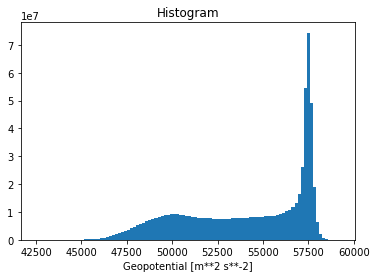

In [14]:
z500.z.sel().plot(bins = 100)
plt.show()

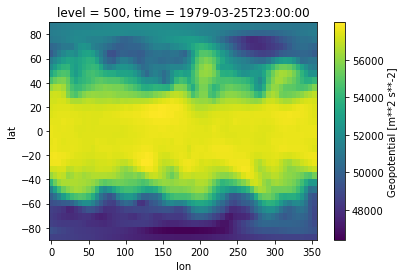

In [29]:
z500.z.isel(time = 2015).plot() # for a specific time 

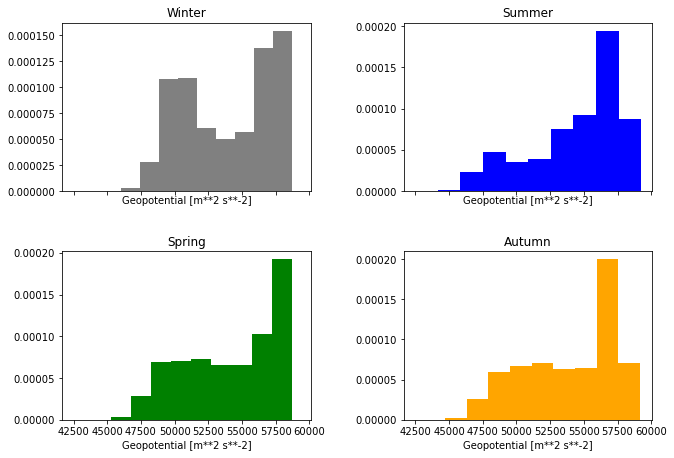

In [191]:
seasonal_plot(z500.z)

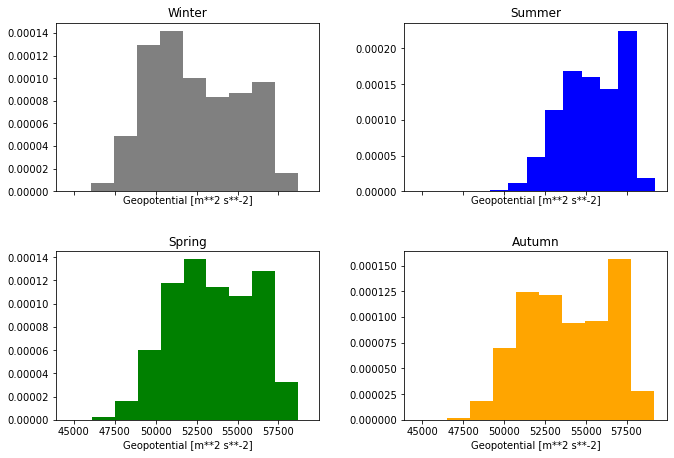

In [23]:
seasonal_plot(z500.z, lat_lower_slice = 23, lat_upper_slice = 90)

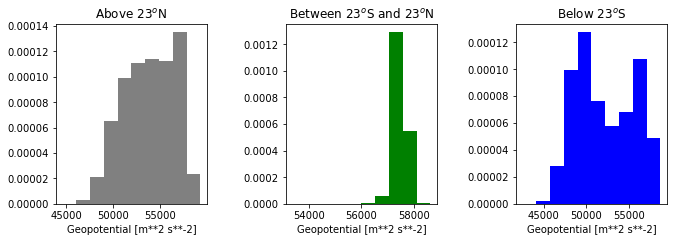

In [25]:
region_plots(z500.z)

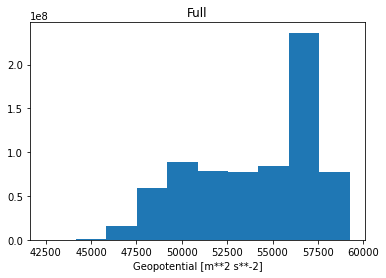

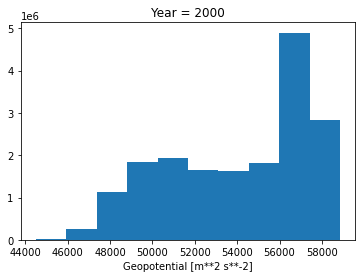

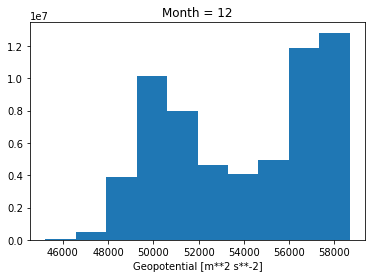

In [228]:
general_plots(z500.z, '2000', 12)

## temperature 2m above surface 

In [64]:
t2m = xr.open_mfdataset(f'{DATADIR}2m_temperature/*.nc', combine='by_coords')
t2m

,Array,Chunk
Bytes,2.87 GB,71.96 MB
Shape,"(350640, 32, 64)","(8784, 32, 64)"
Count,120 Tasks,40 Chunks
Type,float32,numpy.ndarray


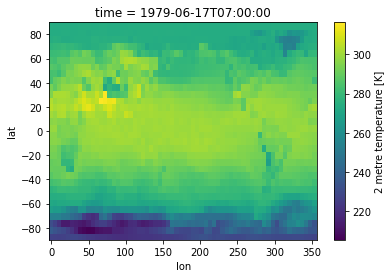

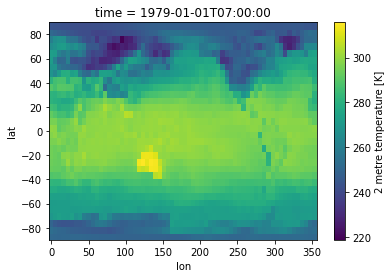

In [113]:
# summer
t2m.t2m.isel(time = 4015).plot() # for a specific time (temp colder at the poles as expected)
plt.show()
# winter
t2m.t2m.isel(time = 7).plot()
plt.show()

# continental masses are very clear here

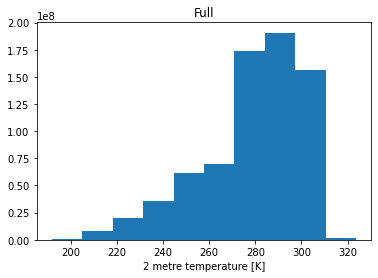

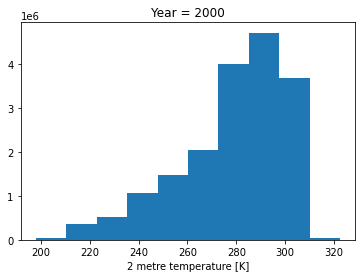

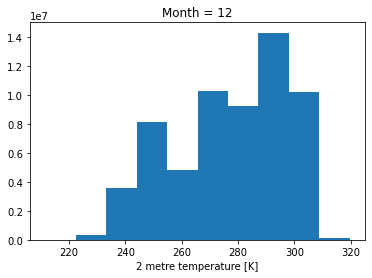

In [229]:
general_plots(t2m.t2m, '2000', 12)

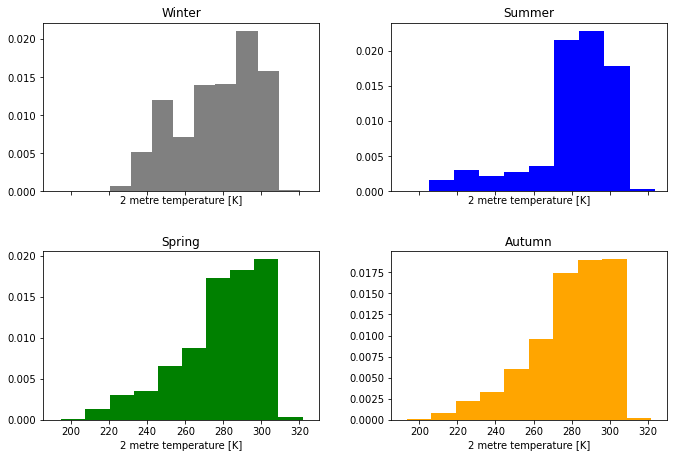

In [194]:
# full hemisphere
seasonal_plot(t2m.t2m)

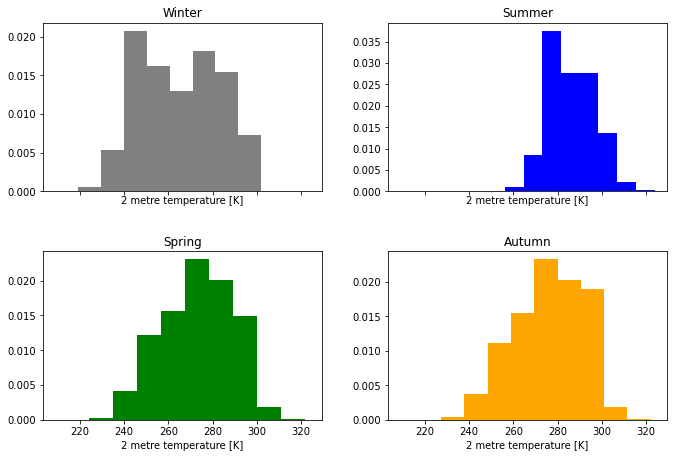

In [195]:
# north hemisphere above tropic of cancer
seasonal_plot(t2m.t2m, lat_lower_slice = 23, lat_upper_slice = 90)

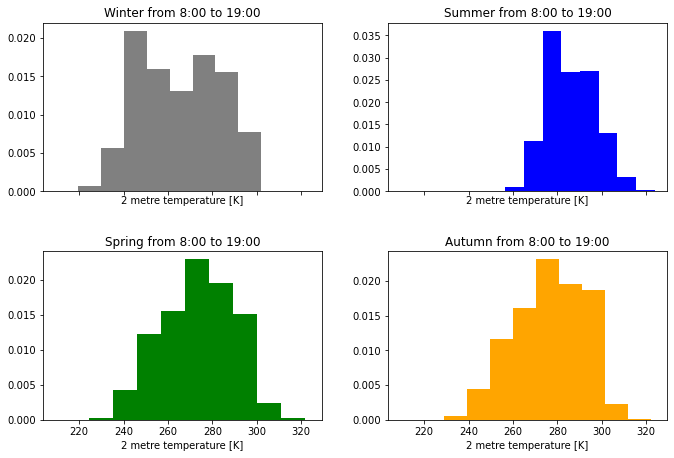

In [65]:
# northern hemisphere daytime
daytime_plots(t2m.t2m, lat_lower_slice = 23, lat_upper_slice = 90, lower_hour = 8, upper_hour = 19)

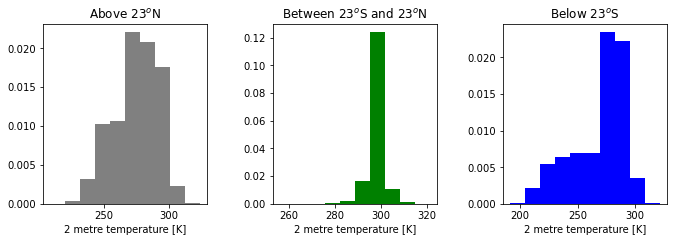

In [220]:
#split by earth region
region_plots(t2m.t2m)

## temperature at 850 hPa

In [15]:
t850 = xr.open_mfdataset(f'{DATADIR}temperature_850/*.nc', combine='by_coords')
t850.t

,Array,Chunk
Bytes,2.87 GB,71.96 MB
Shape,"(350640, 32, 64)","(8784, 32, 64)"
Count,120 Tasks,40 Chunks
Type,float32,numpy.ndarray


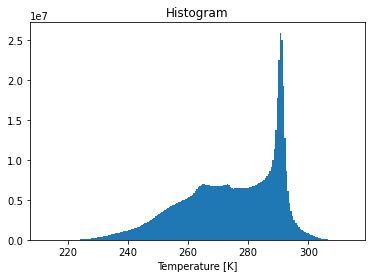

In [20]:
t850.t.sel().plot(bins = 200)
plt.show()

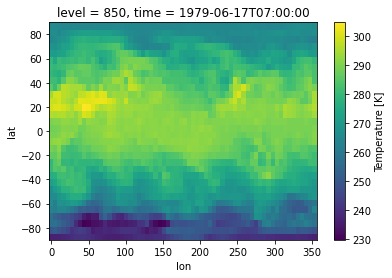

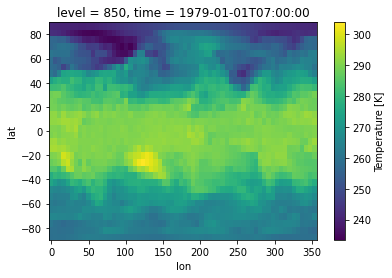

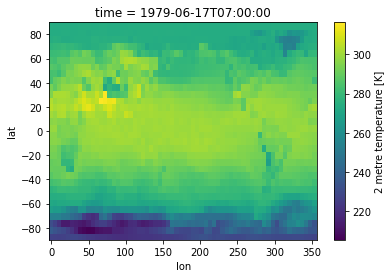

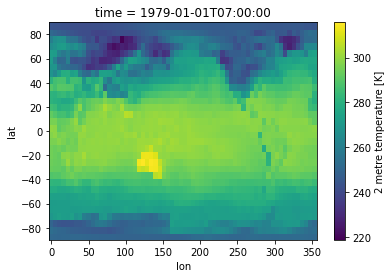

In [222]:
# summer
t850.t.isel(time = 4015).plot() # for a specific time (temp colder at the poles as expected)
plt.show()
# winter
t850.t.isel(time = 7).plot()
plt.show()

# continental masses are much less clear here

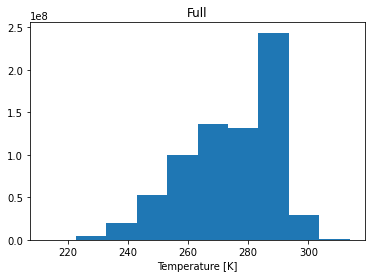

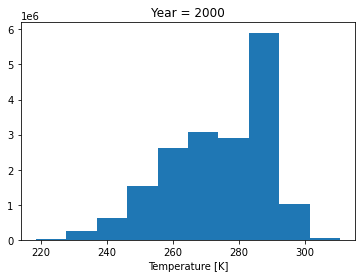

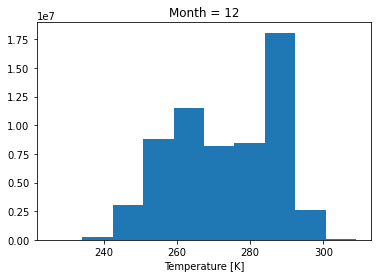

In [230]:
general_plots(t850.t, '2000', 12)

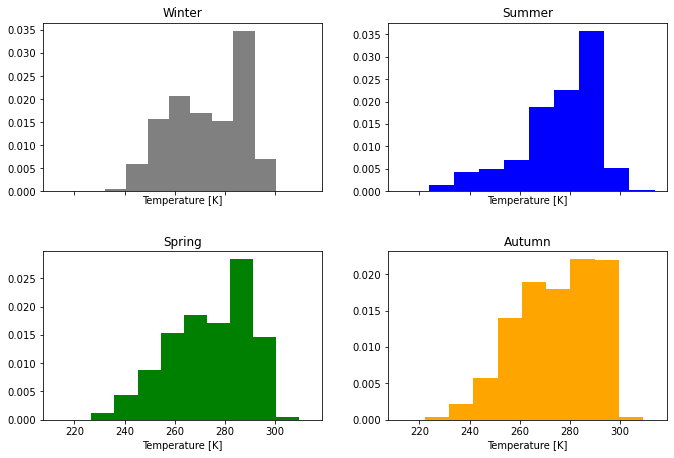

In [210]:
seasonal_plot(t850.t)

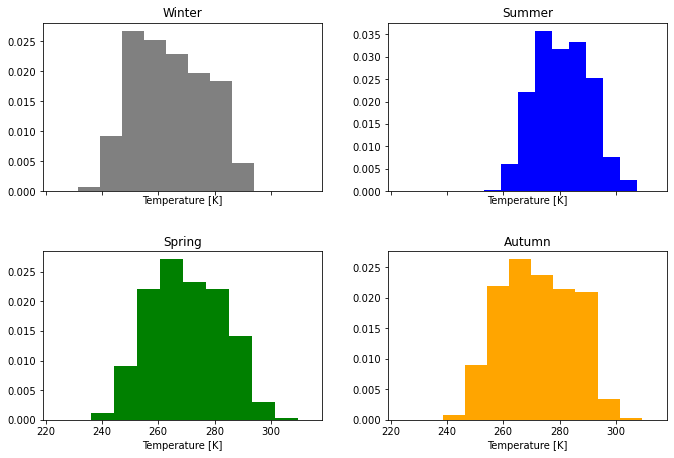

In [211]:
# north hemisphere above tropic of cancer
seasonal_plot(t850.t, lat_lower_slice = 23, lat_upper_slice = 90)

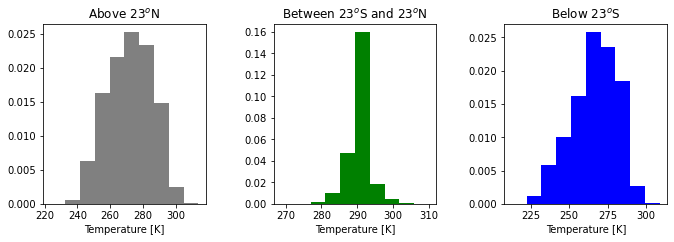

In [219]:
region_plots(t850.t)

## Incident solar radiation

In [12]:
solar_rad = xr.open_mfdataset(f'{DATADIR}toa_incident_solar_radiation/*.nc', combine='by_coords')

,Array,Chunk
Bytes,2.87 GB,71.96 MB
Shape,"(350633, 32, 64)","(8784, 32, 64)"
Count,120 Tasks,40 Chunks
Type,float32,numpy.ndarray


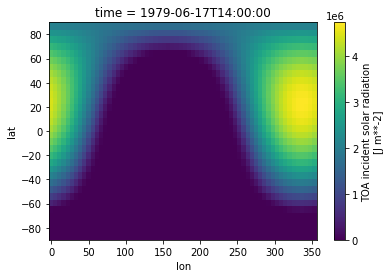

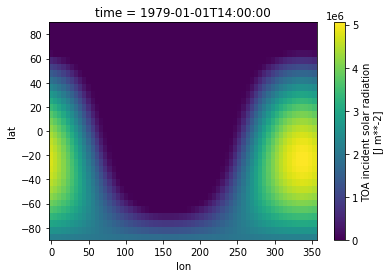

In [14]:
solar_rad.tisr.isel(time = 4015).plot() # for a specific time (temp colder at the poles as expected)
plt.show()
# winter
solar_rad.tisr.isel(time = 7).plot()
plt.show()


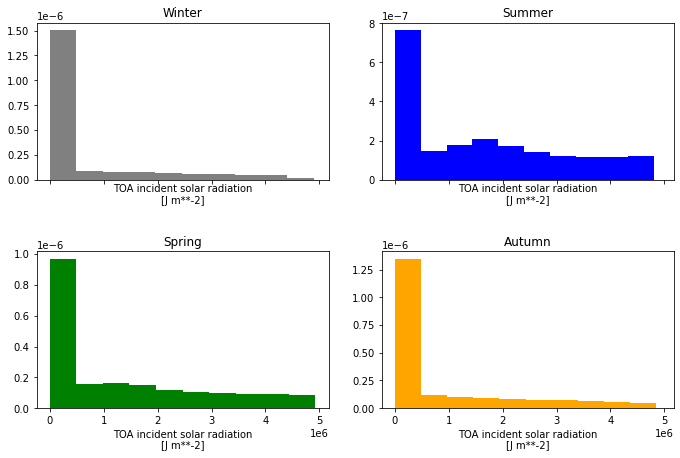

In [19]:
seasonal_plot(solar_rad.tisr, lat_lower_slice = 0, lat_upper_slice = 90)

## Total cloud cover

In [41]:
cloud_cover = xr.open_mfdataset(f'{DATADIR}total_cloud_cover/*.nc', combine='by_coords')

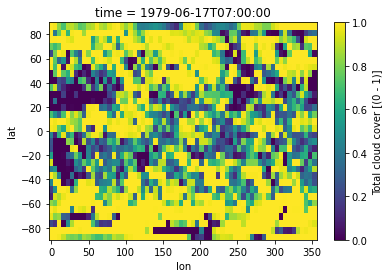

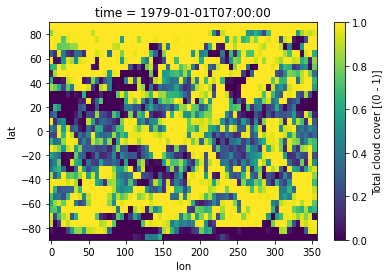

In [44]:
cloud_cover.tcc.isel(time = 4015).plot() # for a specific time (temp colder at the poles as expected)
plt.show()
# winter
cloud_cover.tcc.isel(time = 7).plot()
plt.show()


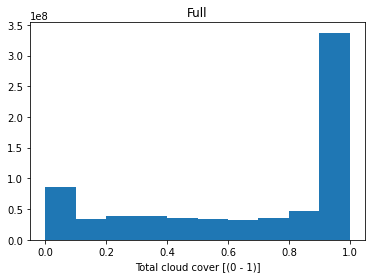

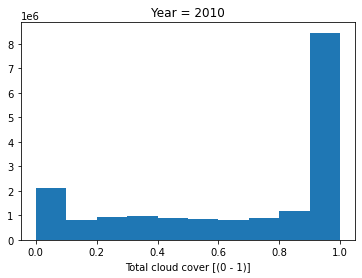

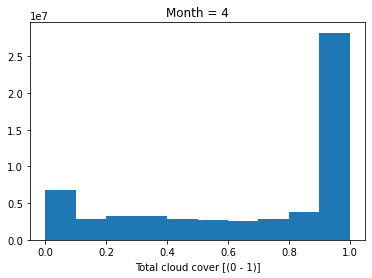

In [50]:
general_plots(cloud_cover.tcc, '2010', 4)

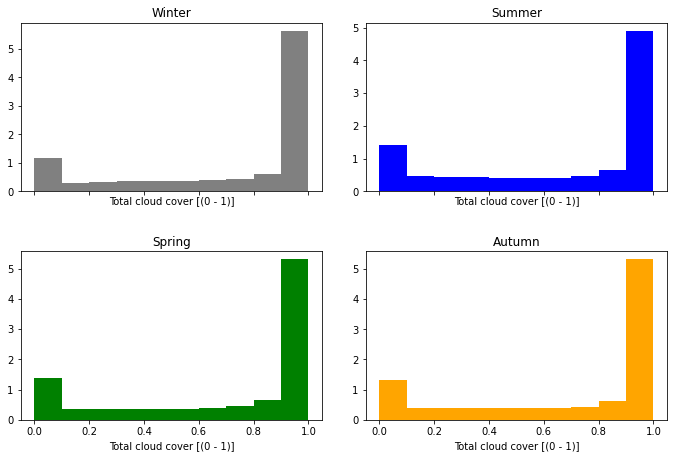

In [48]:
seasonal_plot(cloud_cover.tcc, lat_lower_slice = 23, lat_upper_slice = 90)

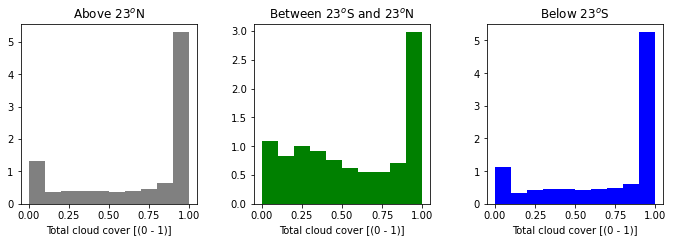

In [47]:
region_plots(cloud_cover.tcc)

## Humidity

In [4]:
rel_hum = xr.open_mfdataset(f'{DATADIR}relative_humidity/*.nc', combine='by_coords')
spec_hum = xr.open_mfdataset(f'{DATADIR}specific_humidity/*.nc', combine='by_coords')

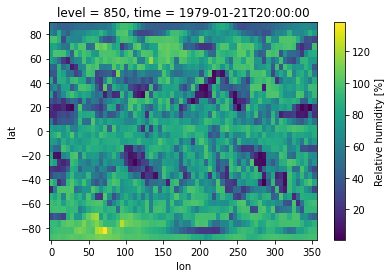

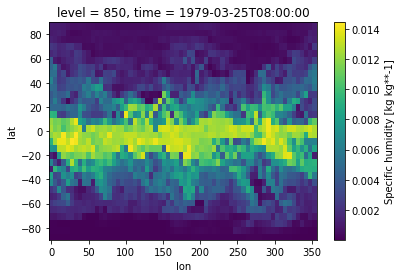

In [54]:
rel_hum.r.isel(time = 500, level = 10).plot()
plt.show()
spec_hum.q.isel(time = 500, level = 10).plot() # centred around the equator
plt.show()

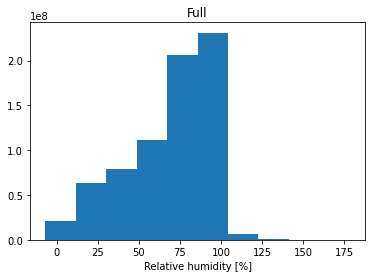

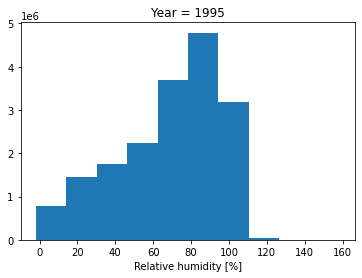

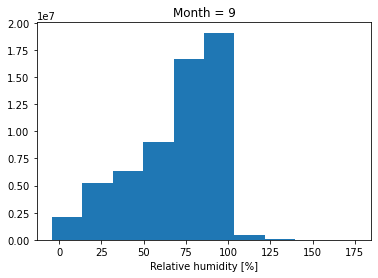

In [61]:
general_plots(rel_hum.r.sel(level = 850), '1995', 9)

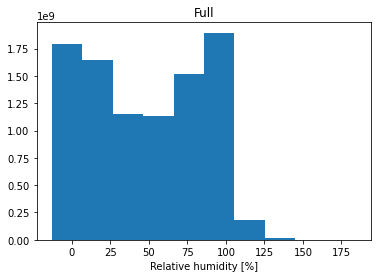

In [62]:
general_plots(rel_hum.r)

In [24]:
tmp = rel_hum.where(rel_hum.r <= 100) #, other = 100)
rel_hum_restr = tmp.where(tmp.r >= 0) #, other = 0)

(array([2.18312243e+09, 8.26201346e+08, 6.53934875e+08, 5.84755437e+08,
        5.56371529e+08, 5.67054255e+08, 6.20573458e+08, 7.54422930e+08,
        8.92854214e+08, 1.13902081e+09]),
 array([1.1934101e-06, 1.0000001e+01, 2.0000002e+01, 3.0000000e+01,
        4.0000000e+01, 5.0000000e+01, 6.0000000e+01, 7.0000000e+01,
        8.0000000e+01, 9.0000000e+01, 1.0000000e+02], dtype=float32),
 <BarContainer object of 10 artists>)

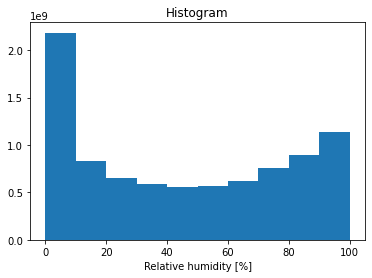

In [25]:
rel_hum_restr.r.plot()

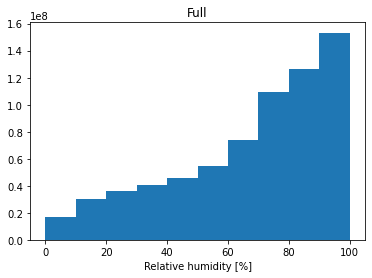

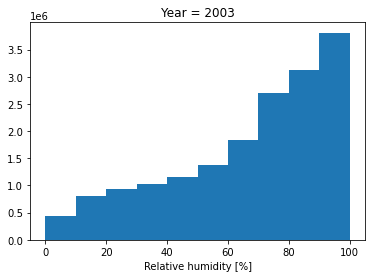

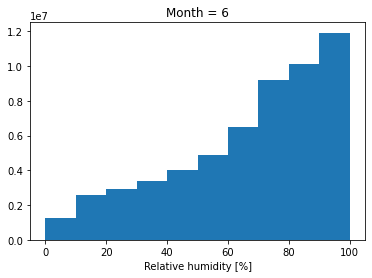

In [27]:
general_plots(rel_hum_restr.r.sel(level = 850), '2003', 6)

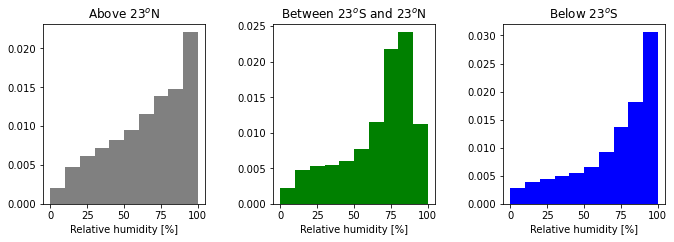

In [29]:
region_plots(rel_hum_restr.r.sel(level = 850))

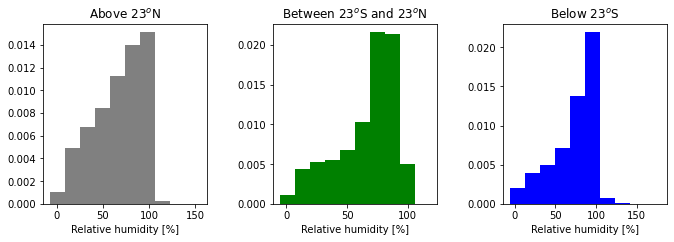

In [30]:
region_plots(rel_hum.r.sel(level = 850))

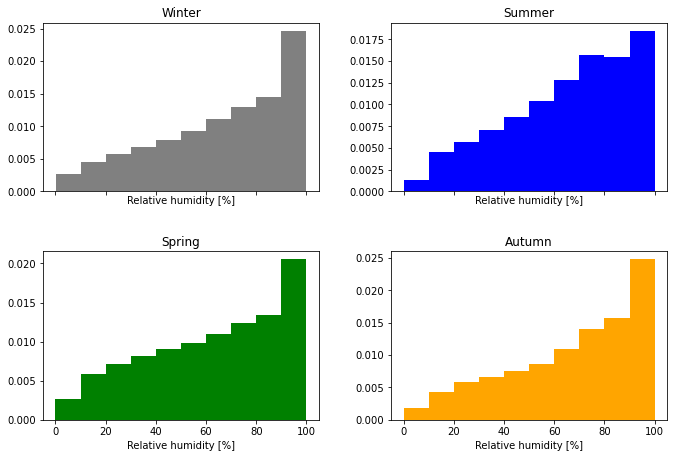

In [32]:
seasonal_plot(rel_hum_restr.r.sel(level = 850), lat_lower_slice = 23, lat_upper_slice = 90)

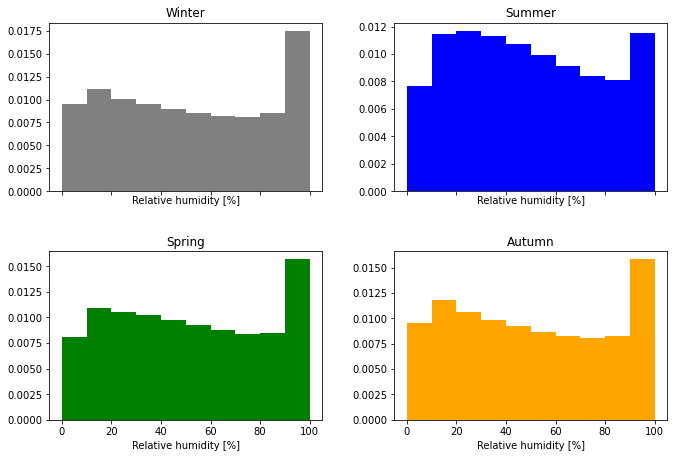

In [33]:
seasonal_plot(rel_hum_restr.r.sel(level = 500), lat_lower_slice = 23, lat_upper_slice = 90)

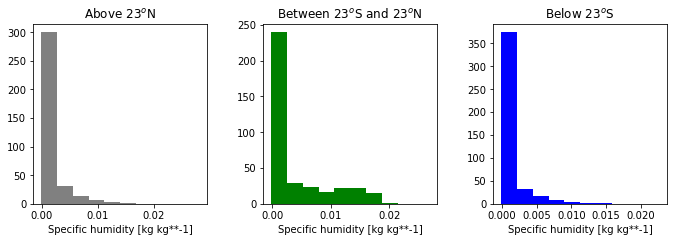

In [35]:
region_plots(spec_hum.q)

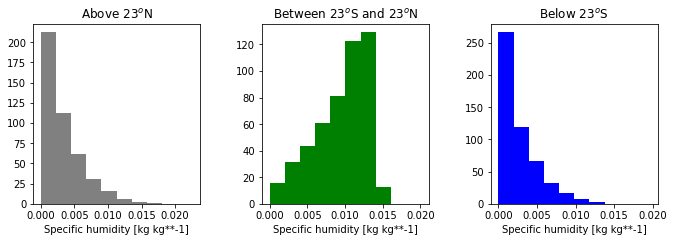

In [36]:
region_plots(spec_hum.q.sel(level = 850))

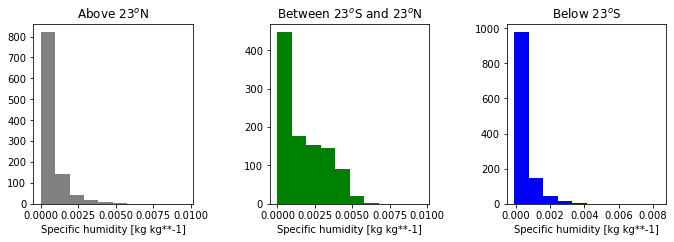

In [40]:
region_plots(spec_hum.q.sel(level = 500))

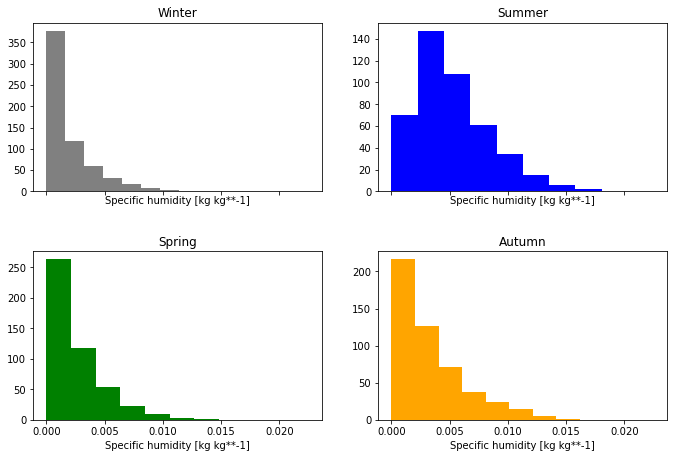

In [37]:
seasonal_plot(spec_hum.q.sel(level = 850), lat_lower_slice = 23, lat_upper_slice = 90)

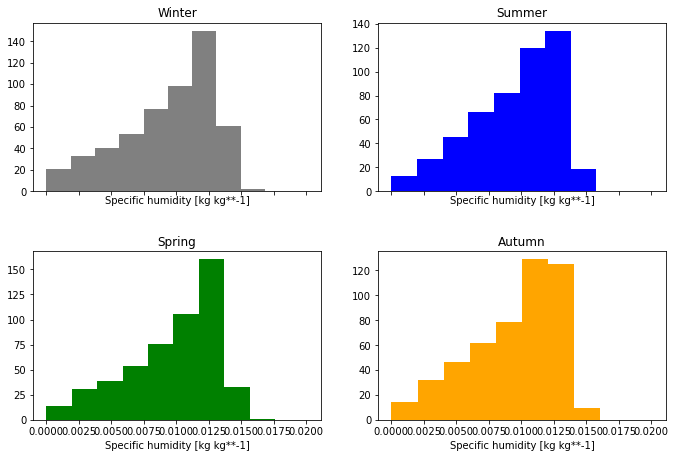

In [39]:
seasonal_plot(spec_hum.q.sel(level = 850), lat_lower_slice = -23, lat_upper_slice = 23)

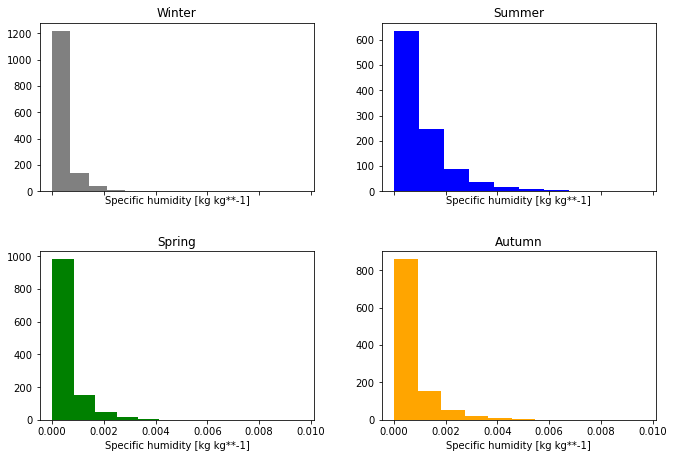

In [38]:
seasonal_plot(spec_hum.q.sel(level = 500), lat_lower_slice = 23, lat_upper_slice = 90)

## Total precipitation

In [3]:
## urged caution because this is reanalysis data

tp = xr.open_mfdataset(f'{DATADIR}total_precipitation/*.nc', combine='by_coords')#.tp.rolling(time=6).sum()

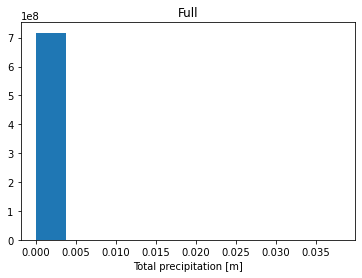

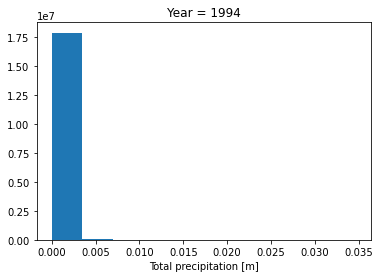

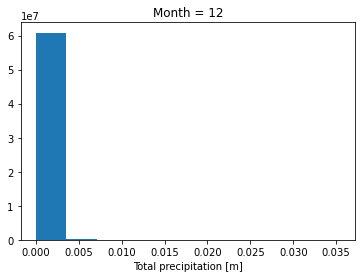

In [231]:
general_plots(tp.tp, '1994', 12)

In [232]:
cumul_tp = xr.open_mfdataset(f'{DATADIR}total_precipitation/*.nc', combine='by_coords').tp.rolling(time=6).sum()

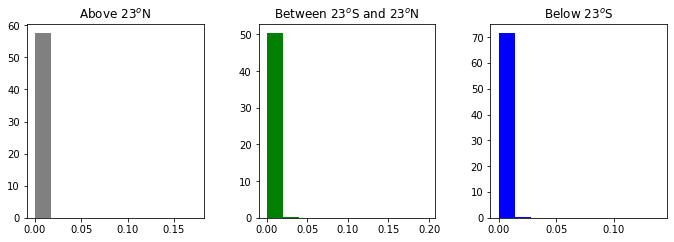

In [242]:
region_plots(cumul_tp)

## Vorticity

In [3]:
pot_vort = xr.open_mfdataset(f'{DATADIR}potential_vorticity/*.nc', combine='by_coords')

In [5]:
pot_vort

,Array,Chunk
Bytes,37.34 GB,935.46 MB
Shape,"(350640, 13, 32, 64)","(8784, 13, 32, 64)"
Count,120 Tasks,40 Chunks
Type,float32,numpy.ndarray


In [4]:
general_plots(pot_vort.pv)

NameError: name 'general_plots' is not defined

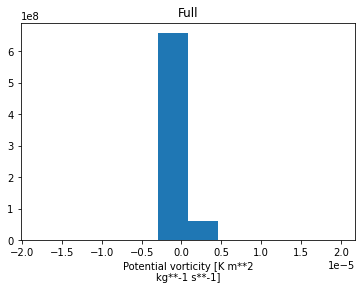

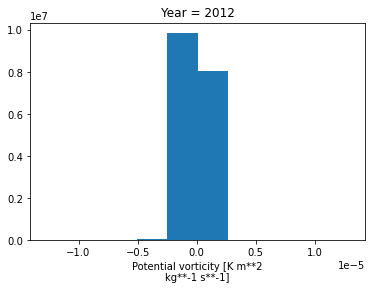

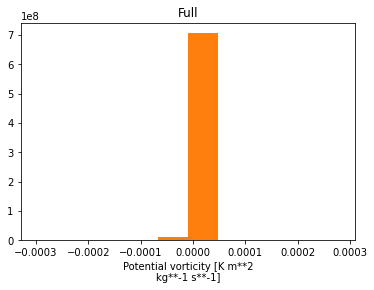

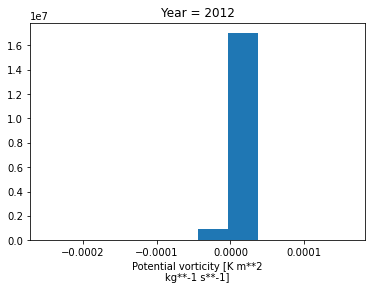

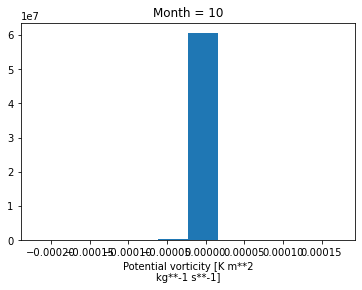

In [34]:
general_plots(pot_vort.pv.sel(level=500), year = '2012', month = 10)
general_plots(pot_vort.pv.sel(level=850), year = '2012', month = 10)

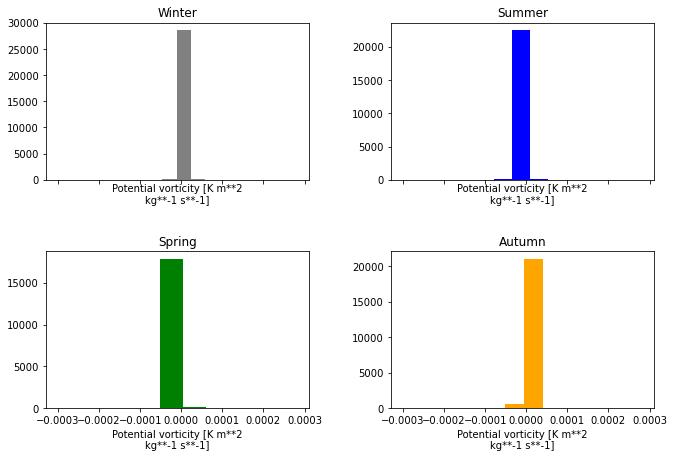

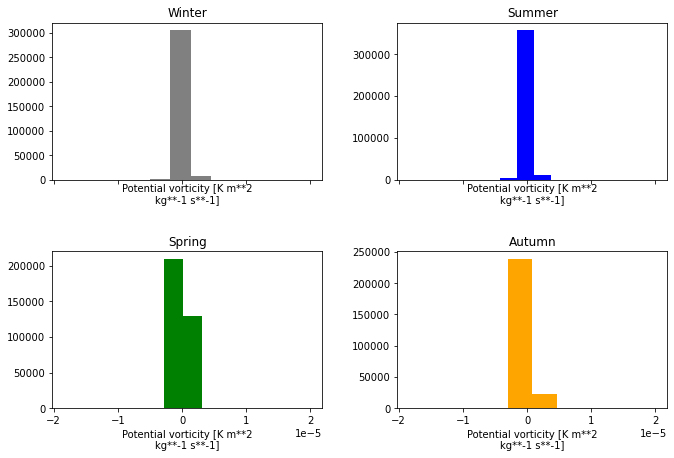

In [35]:
seasonal_plot(pot_vort.pv.sel(level=850))
seasonal_plot(pot_vort.pv.sel(level=500))

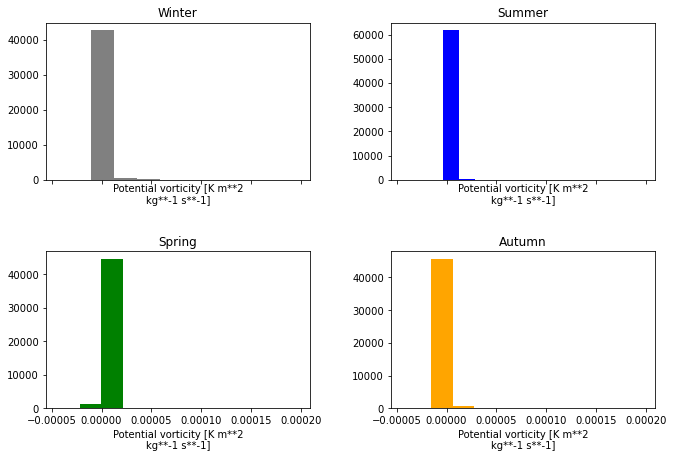

In [36]:
seasonal_plot(pot_vort.pv.sel(level=850), lat_lower_slice = 23, lat_upper_slice = 90)

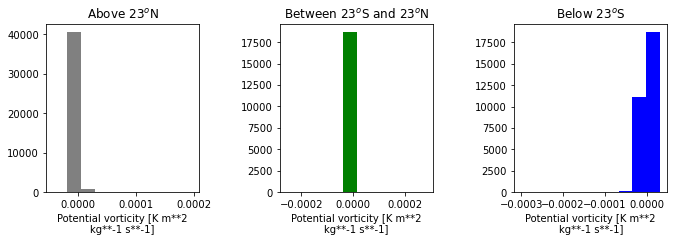

In [37]:
region_plots(pot_vort.pv.sel(level=850))

In [17]:
vorticity = xr.open_mfdataset(f'{DATADIR}vorticity/*.nc', combine='by_coords')
vorticity

,Array,Chunk
Bytes,37.34 GB,935.46 MB
Shape,"(350640, 13, 32, 64)","(8784, 13, 32, 64)"
Count,120 Tasks,40 Chunks
Type,float32,numpy.ndarray


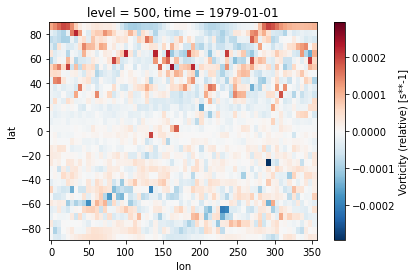

In [24]:
vorticity.vo.isel(level = 7, time =0).plot()

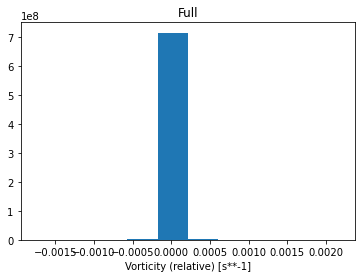

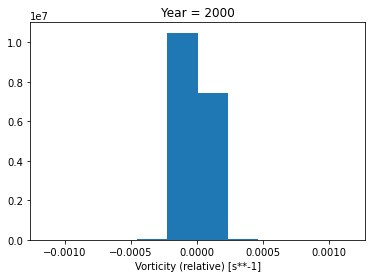

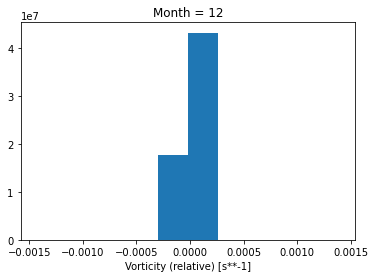

In [39]:
general_plots(vorticity.vo.sel(level = 500), '2000', 12)

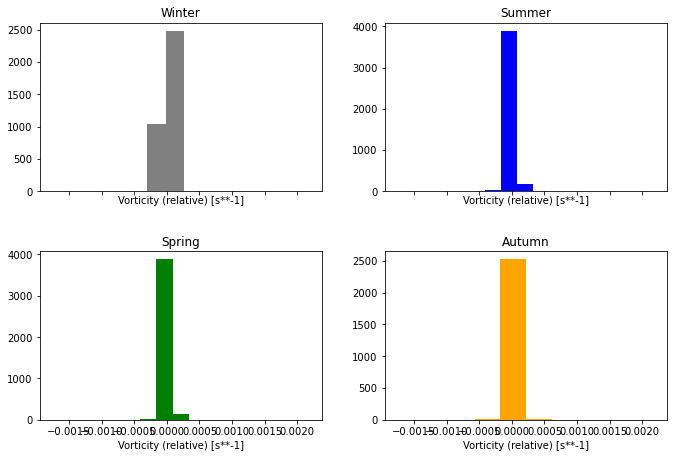

In [40]:
seasonal_plot(vorticity.vo.sel(level = 500))

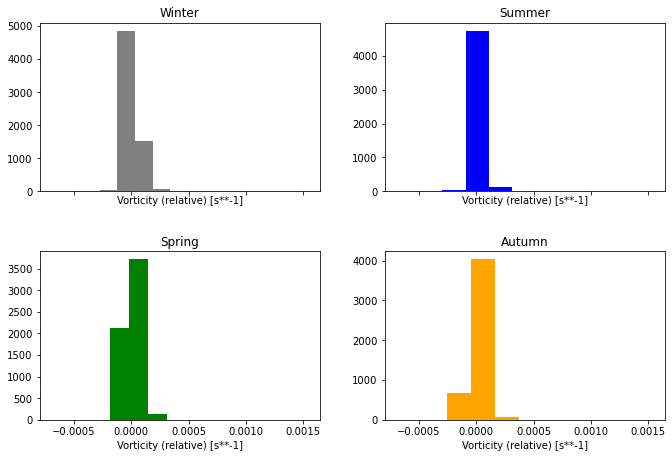

In [41]:
seasonal_plot(vorticity.vo.sel(level = 500), lat_lower_slice = 23, lat_upper_slice = 90)

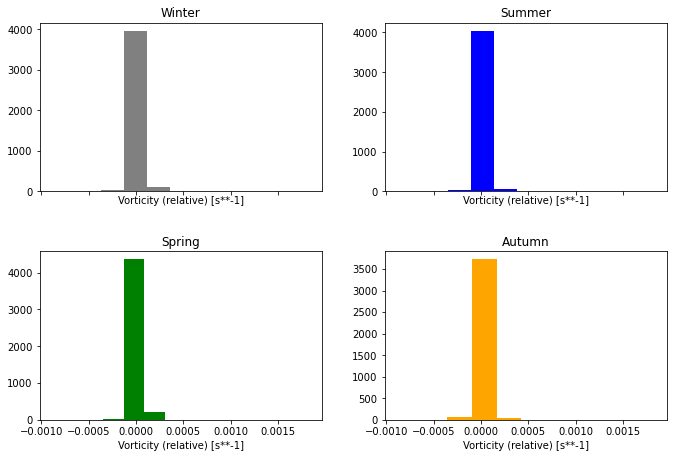

In [42]:
seasonal_plot(vorticity.vo.sel(level = 850), lat_lower_slice = 23, lat_upper_slice = 90)

## Wind

In [51]:
u_wind = xr.open_mfdataset(f'{DATADIR}10m_u_component_of_wind/*.nc', combine='by_coords')
v_wind = xr.open_mfdataset(f'{DATADIR}10m_v_component_of_wind/*.nc', combine='by_coords')

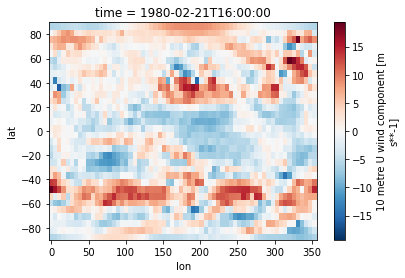

In [53]:
u_wind.u10.isel(time = 10000).plot()

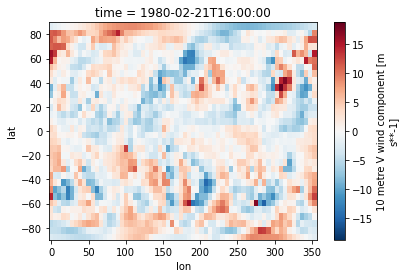

In [54]:
v_wind.v10.isel(time = 10000).plot()

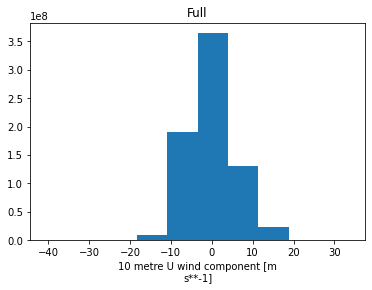

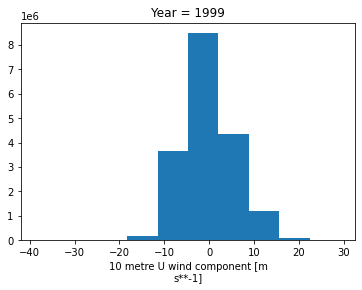

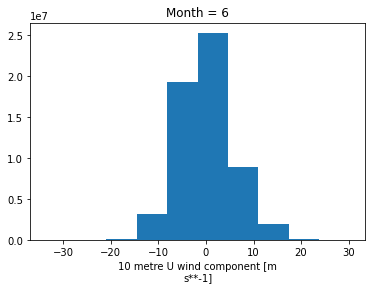

In [56]:
general_plots(u_wind.u10, '1999', 6)

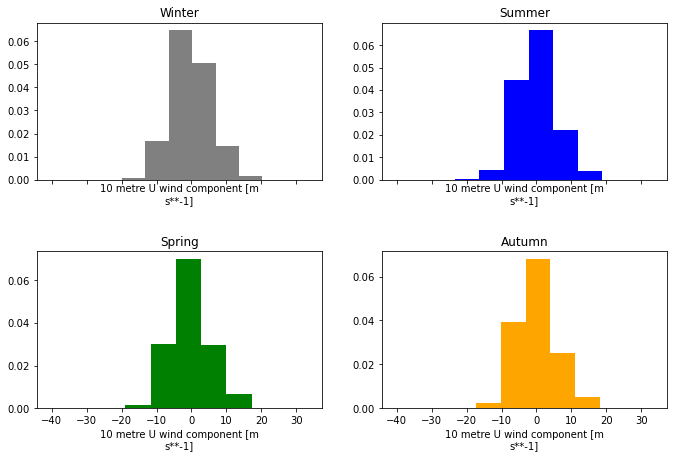

In [58]:
seasonal_plot(u_wind.u10)

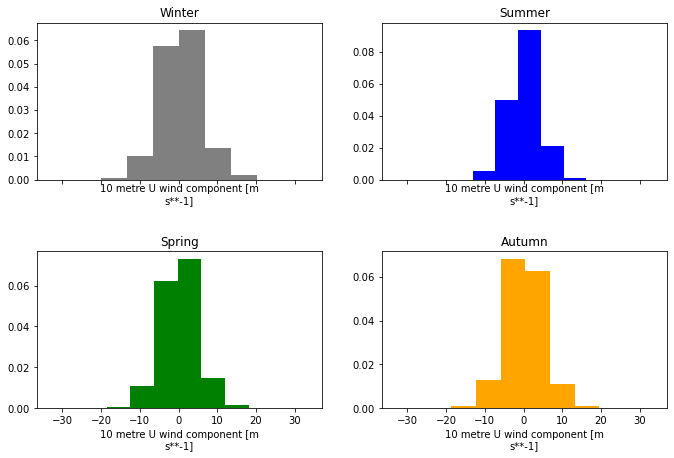

In [62]:
seasonal_plot(u_wind.u10, lat_lower_slice = 23, lat_upper_slice = 90)

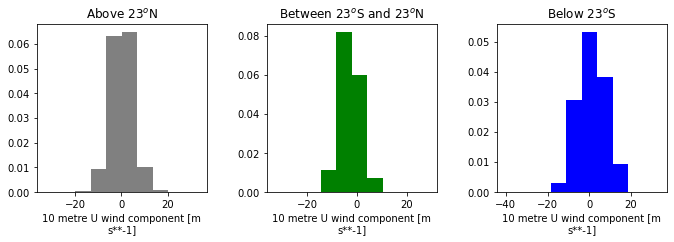

In [61]:
region_plots(u_wind.u10)

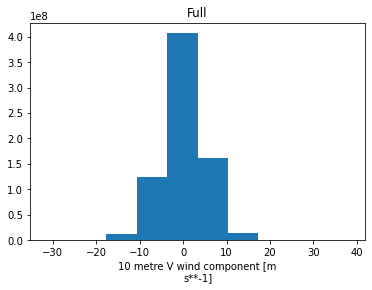

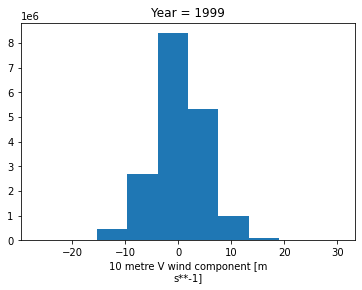

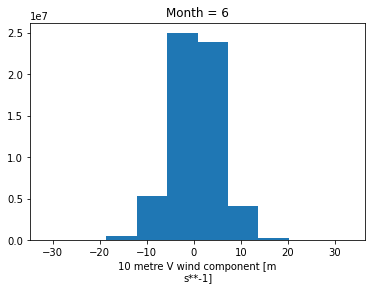

In [57]:
general_plots(v_wind.v10, '1999', 6)

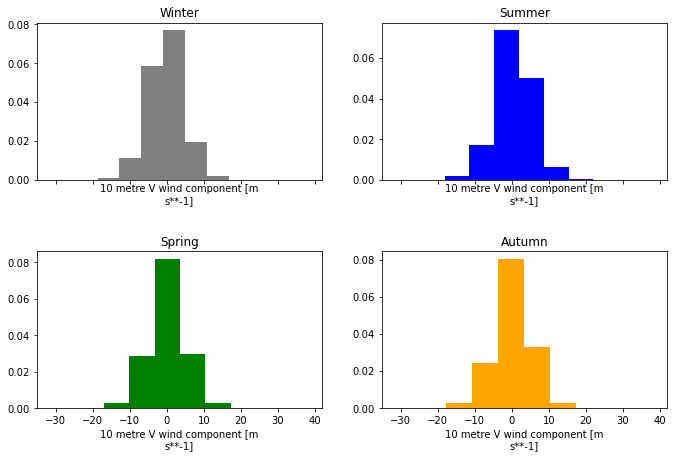

In [59]:
seasonal_plot(v_wind.v10)

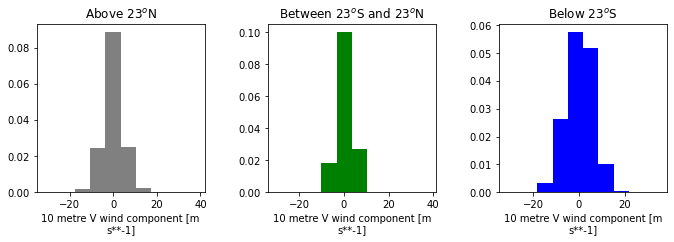

In [60]:
region_plots(v_wind.v10)